In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales-prediction-datasets/sample_submission.csv
/kaggle/input/big-mart-sales-prediction-datasets/train.csv
/kaggle/input/big-mart-sales-prediction-datasets/test.csv


Amaç: Test Verisi ile Satış Miktarını Tahmin Etme ve Sisteme Yükleme
y = Item_Outlet_Sales

In [89]:
train_data = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/train.csv")
test_data = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/test.csv")
sample_submission = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/sample_submission.csv")

## Değişken Açıklamaları

- **`Item_Identifier`**: Ürüne ait benzersiz kimlik (ID).  
- **`Item_Weight`**: Ürünün ağırlığı.  
- **`Item_Fat_Content`**: Ürünün yağ oranı (örn: *low fat* veya *regular*).  
- **`Item_Visibility`**: Ürünün mağazada diğer ürünlere göre ne kadar sergilendiği (% olarak ifade edilir).  
- **`Item_Type`**: Ürünün kategorisi (örn: içecek, yiyecek, temizlik malzemesi vb.).  
- **`Item_MRP`**: Ürünün maksimum perakende satış fiyatı (liste fiyatı).  
- **`Outlet_Identifier`**: Mağazaya ait benzersiz kimlik (ID).  
- **`Outlet_Establishment_Year`**: Mağazanın açıldığı yıl.  
- **`Outlet_Size`**: Mağazanın fiziksel büyüklüğü (örn: küçük, orta, büyük).  
- **`Outlet_Location_Type`**: Mağazanın bulunduğu şehrin türü (örn: kırsal, yarı kentsel, kentsel).  
- **`Outlet_Type`**: Mağazanın türü (örn: bakkal veya süpermarket).  
- **`Item_Outlet_Sales`**: Ürünün belirli bir mağazada gerçekleşen satış miktarı (tahmin edilecek hedef değişken).  


In [90]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [91]:
test_data_temp = test_data[['Item_Identifier', 'Outlet_Identifier']]

In [92]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [93]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [94]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [95]:
train_data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

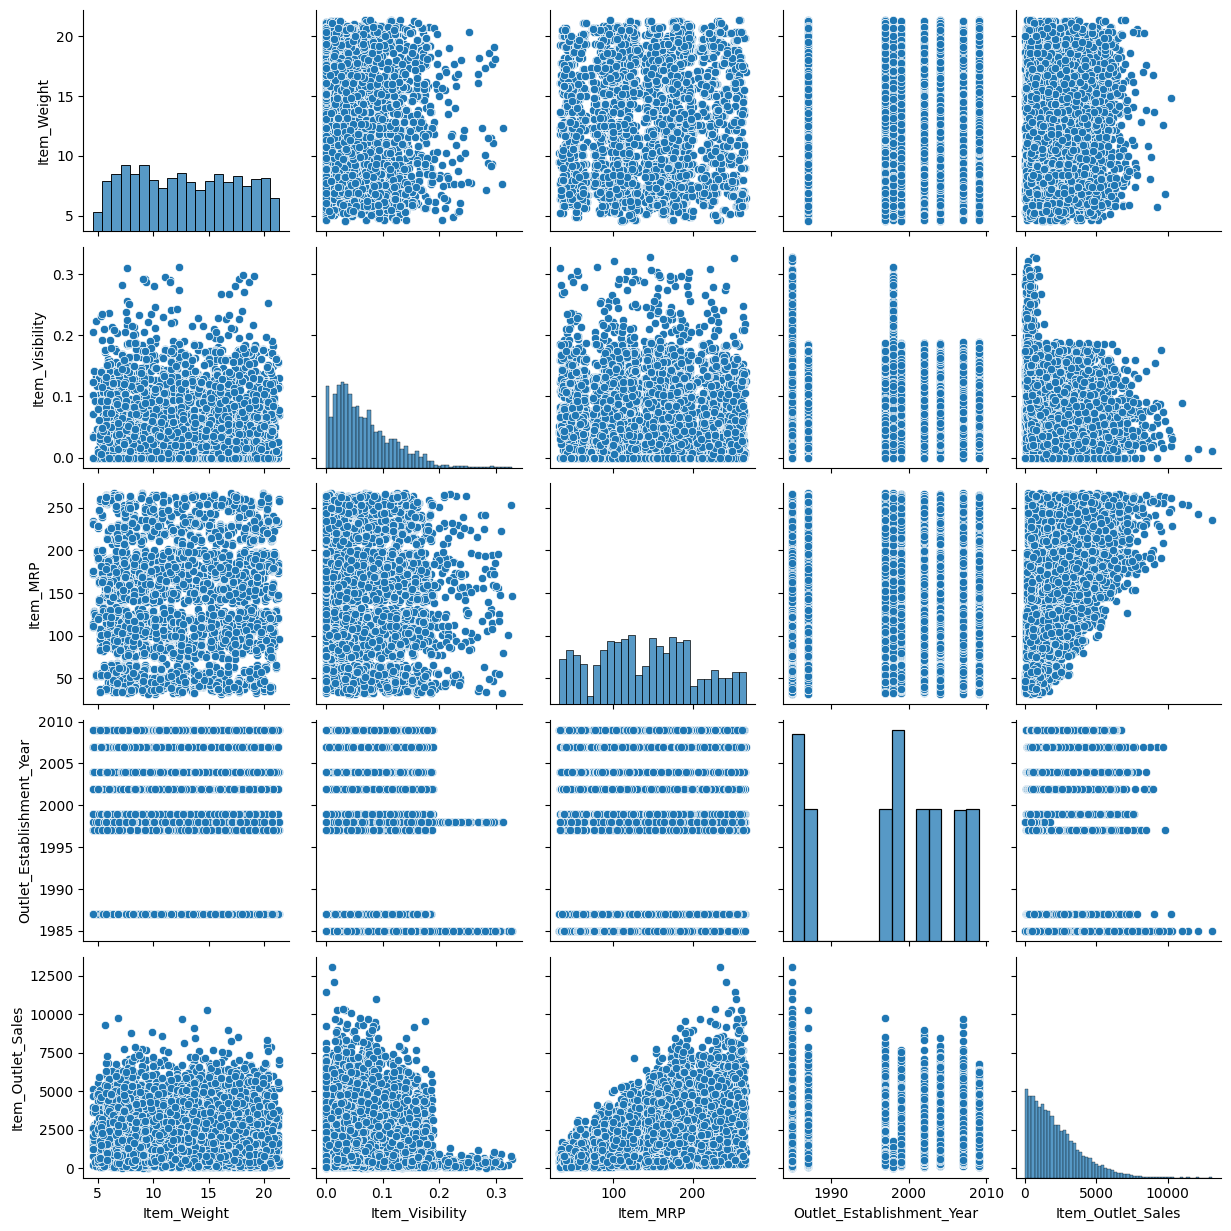

In [96]:
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pairplot(train_data)

plt.show()

In [97]:
# import matplotlib.pyplot as plt

# # Özellik adlarını alın
# columns = train_data.columns

# # Her iki veri setinin histogramlarını yan yana çiz
# fig, axes = plt.subplots(len(columns), 2, figsize=(20, len(columns)*5))
# fig.suptitle('Train vs Test Data Comparison', fontsize=16)

# for i, column in enumerate(columns):
#     # Train data için histogram
#     axes[i, 0].hist(train_data[column], bins="auto", color='blue', alpha=0.7)
#     axes[i, 0].set_title(f'Train Data - {column}')
    
#     # Test data için histogram
#     axes[i, 1].hist(test_data[column], bins="auto", color='green', alpha=0.7)
#     axes[i, 1].set_title(f'Test Data - {column}')

# # Aralarındaki boşlukları ayarla
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

In [98]:
# # Veriyi hazırlama
# data = {'Train Data': train_data, 'Test Data': test_data}

# # Boxplot oluşturma
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=data)
# plt.title('Train ve Test Verisindeki Aykırı Değerlerin Kıyaslanması')
# plt.show()

In [99]:
drop_na_df = train_data.copy()
drop_na_test_df = test_data.copy()

In [100]:
drop_na_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
drop_na_df = pd.get_dummies(drop_na_df, columns=cat_columns)

drop_na_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


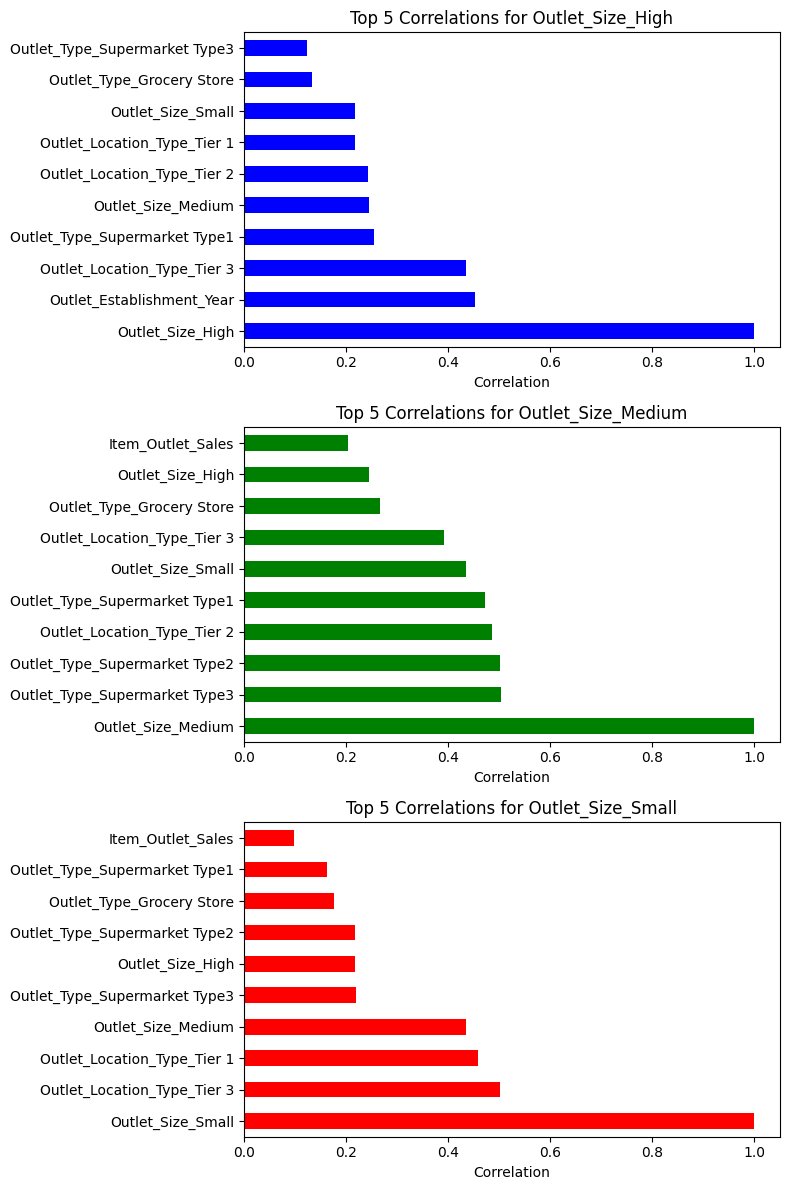

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = drop_na_df.corr()

outlet_high_corr = correlation_matrix['Outlet_Size_High'].abs().sort_values(ascending=False).head(10)
outlet_medium_corr = correlation_matrix['Outlet_Size_Medium'].abs().sort_values(ascending=False).head(10)
outlet_small_corr = correlation_matrix['Outlet_Size_Small'].abs().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

outlet_high_corr.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Correlations for Outlet_Size_High')
axes[0].set_xlabel('Correlation')

outlet_medium_corr.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Correlations for Outlet_Size_Medium')
axes[1].set_xlabel('Correlation')

outlet_small_corr.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Correlations for Outlet_Size_Small')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.show()


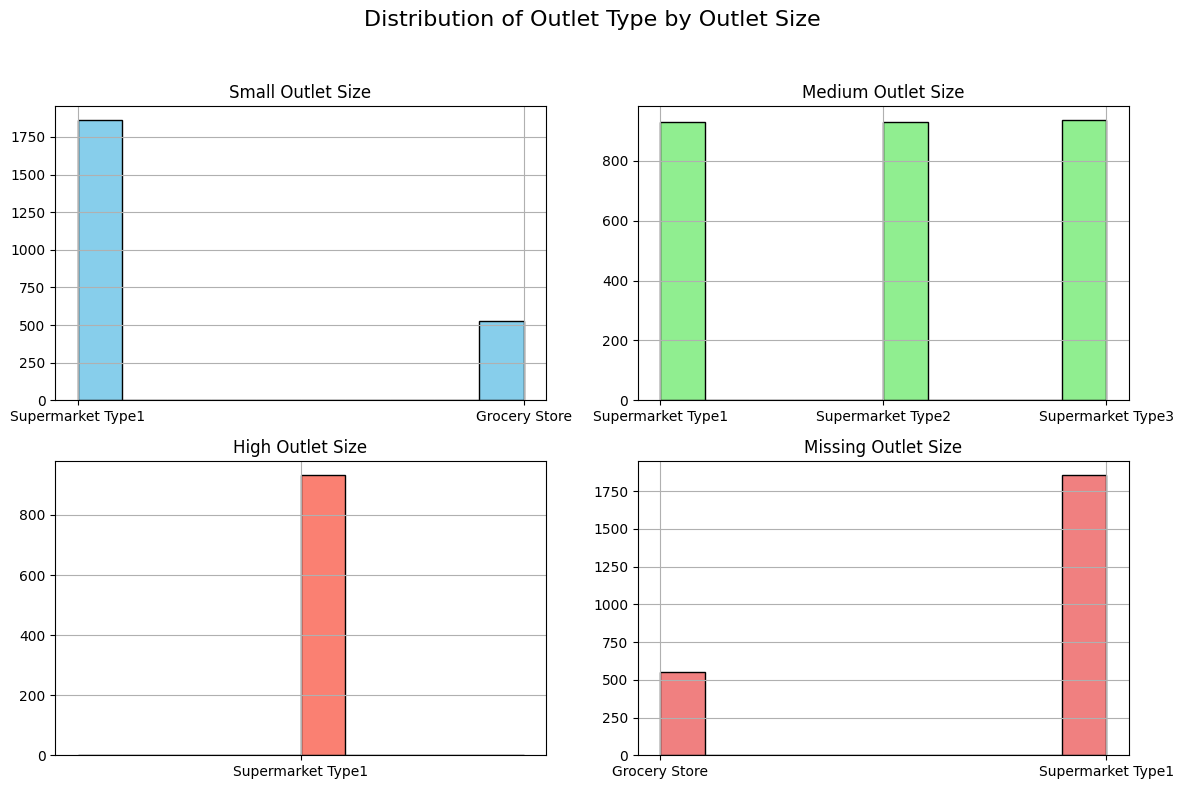

In [102]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Outlet Type by Outlet Size', fontsize=16)

train_data[train_data['Outlet_Size'] == 'Small']['Outlet_Type'].hist(ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Small Outlet Size')

train_data[train_data['Outlet_Size'] == 'Medium']['Outlet_Type'].hist(ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Medium Outlet Size')

train_data[train_data['Outlet_Size'] == 'High']['Outlet_Type'].hist(ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('High Outlet Size')

train_data[train_data['Outlet_Size'].isna()]['Outlet_Type'].hist(ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Missing Outlet Size')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [103]:
train_data.loc[(train_data['Outlet_Size'].isna()) & (train_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

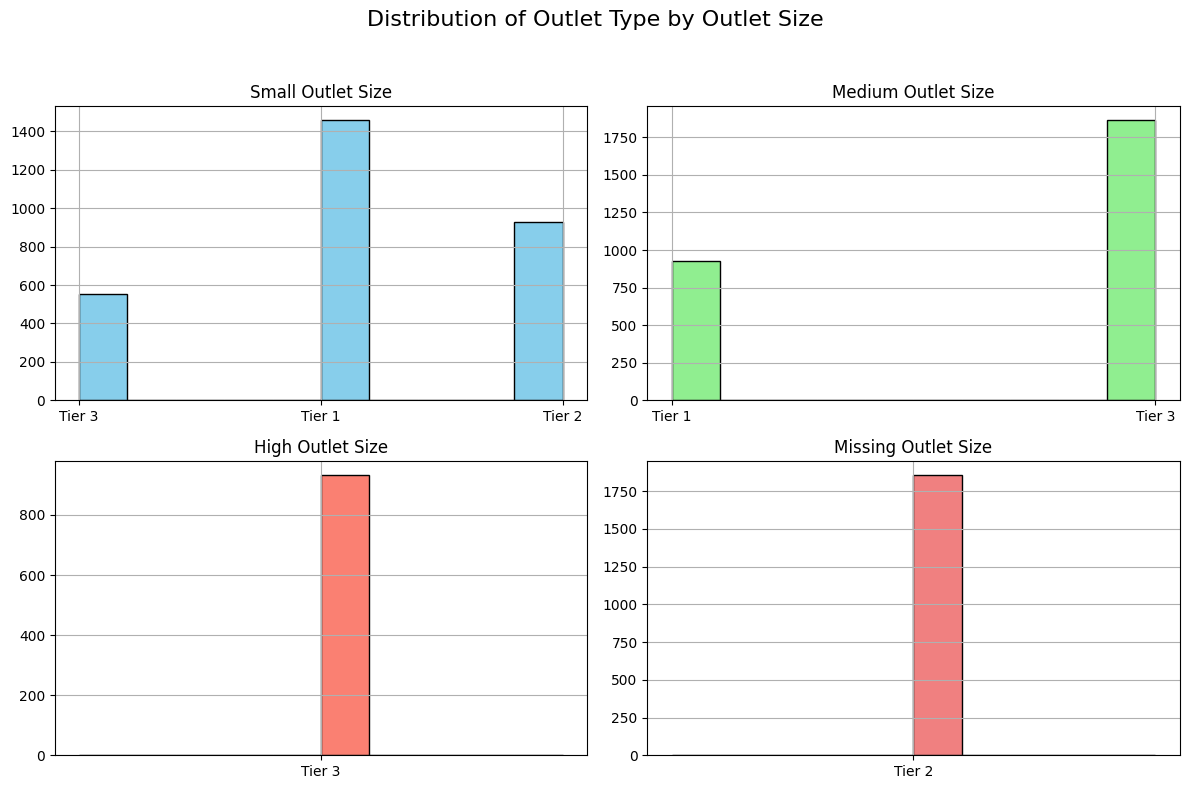

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Outlet Type by Outlet Size', fontsize=16)

train_data[train_data['Outlet_Size'] == 'Small']['Outlet_Location_Type'].hist(ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Small Outlet Size')

train_data[train_data['Outlet_Size'] == 'Medium']['Outlet_Location_Type'].hist(ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Medium Outlet Size')

train_data[train_data['Outlet_Size'] == 'High']['Outlet_Location_Type'].hist(ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('High Outlet Size')

train_data[train_data['Outlet_Size'].isna()]['Outlet_Location_Type'].hist(ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Missing Outlet Size')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [105]:
train_data.loc[(train_data['Outlet_Size'].isna()) & (train_data['Outlet_Location_Type'] == 'Tier 2'), 'Outlet_Size'] = 'Small'
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [106]:
drop_na_test_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
drop_na_test_df = pd.get_dummies(drop_na_test_df, columns=cat_columns)

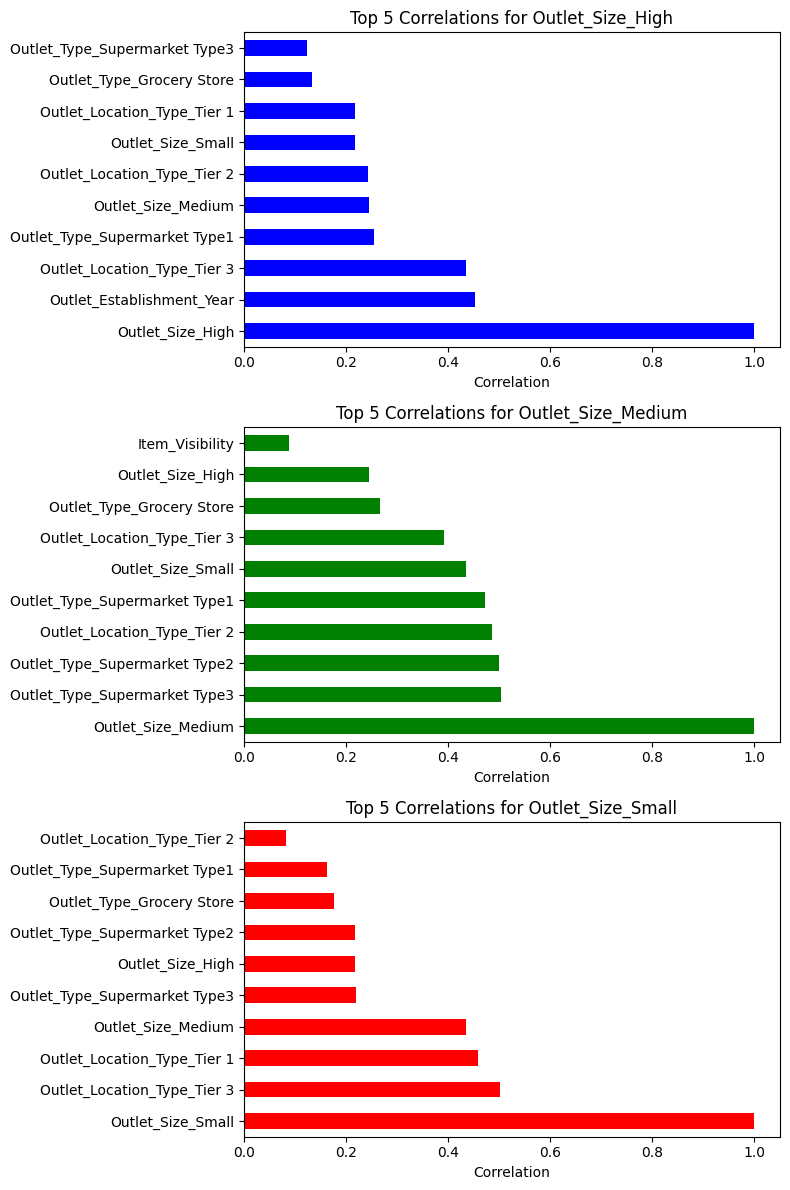

In [107]:
correlation_matrix = drop_na_test_df.corr()

outlet_high_corr = correlation_matrix['Outlet_Size_High'].abs().sort_values(ascending=False).head(10)
outlet_medium_corr = correlation_matrix['Outlet_Size_Medium'].abs().sort_values(ascending=False).head(10)
outlet_small_corr = correlation_matrix['Outlet_Size_Small'].abs().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

outlet_high_corr.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Correlations for Outlet_Size_High')
axes[0].set_xlabel('Correlation')

outlet_medium_corr.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Correlations for Outlet_Size_Medium')
axes[1].set_xlabel('Correlation')

outlet_small_corr.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Correlations for Outlet_Size_Small')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.show()

In [108]:
test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

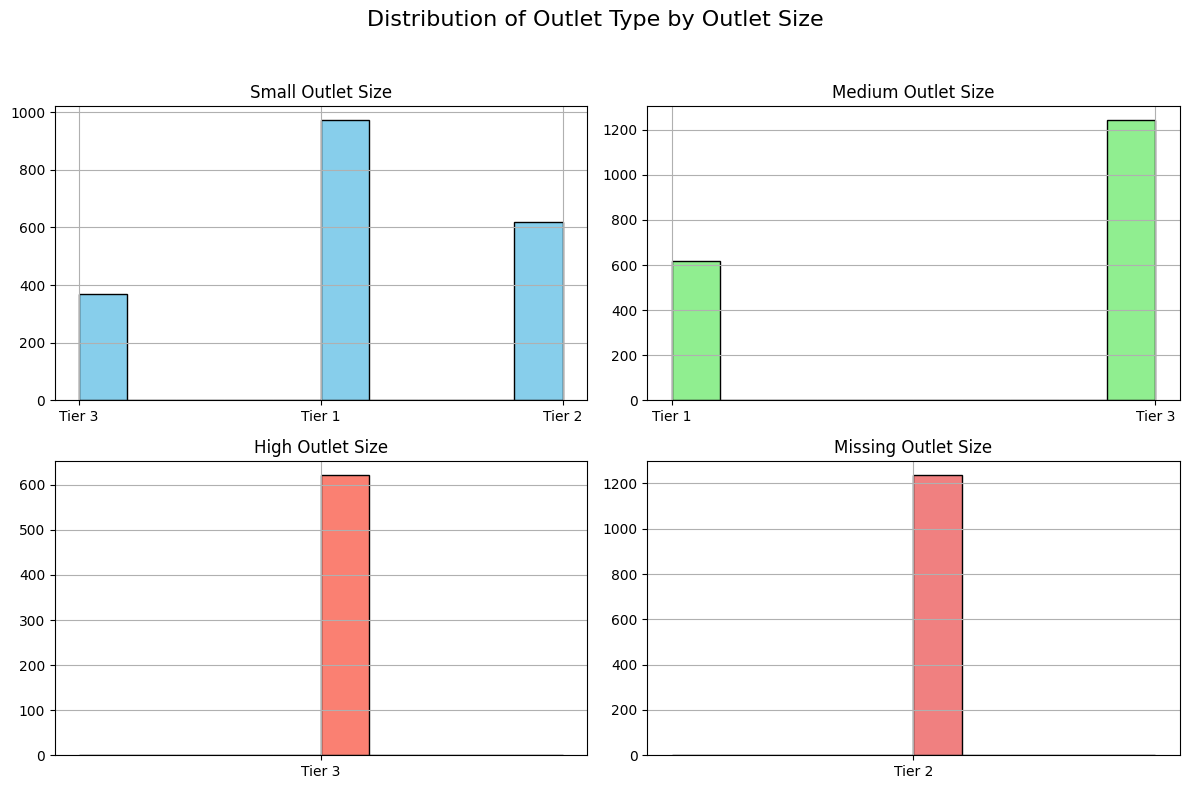

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Outlet Type by Outlet Size', fontsize=16)

test_data[test_data['Outlet_Size'] == 'Small']['Outlet_Location_Type'].hist(ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Small Outlet Size')

test_data[test_data['Outlet_Size'] == 'Medium']['Outlet_Location_Type'].hist(ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Medium Outlet Size')

test_data[test_data['Outlet_Size'] == 'High']['Outlet_Location_Type'].hist(ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('High Outlet Size')

test_data[test_data['Outlet_Size'].isna()]['Outlet_Location_Type'].hist(ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Missing Outlet Size')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [110]:
test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Location_Type'] == 'Tier 2'), 'Outlet_Size'] = 'Small'

In [111]:
outlet_small_corr = correlation_matrix['Item_Weight'].abs().sort_values(ascending=False).head(10)
outlet_small_corr

Item_Weight                        1.000000
Item_Type_Breads                   0.068410
Item_Fat_Content_Low Fat           0.053775
Item_MRP                           0.049809
Item_Type_Soft Drinks              0.048671
Item_Fat_Content_Regular           0.045292
Item_Type_Household                0.043726
Item_Type_Frozen Foods             0.041776
Item_Type_Others                   0.039565
Item_Type_Fruits and Vegetables    0.038645
Name: Item_Weight, dtype: float64

In [112]:
item_type_list = train_data['Item_Type'].unique().tolist()
item_type_list_test = test_data['Item_Type'].unique().tolist()

In [113]:
for type in item_type_list:
    train_data.loc[(train_data['Item_Weight'].isna()) & (train_data['Item_Type'] == type), 'Item_Weight'] = train_data[train_data['Item_Type'] == type]['Item_Weight'].mean()

In [114]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
train_data['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [116]:
cat_data_corr = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Identifier', 'Outlet_Type']


correlation_matrix = train_data.drop(columns=cat_data_corr).corr()
correlation_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


In [117]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


result = pd.DataFrame()

for col in cat_data_corr:
    model = ols(f'Item_Outlet_Sales ~ C({col})', data=train_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # ANOVA testini yap
    
    anova_table['Variable'] = col
    result = pd.concat([result, anova_table])

result

,sum_sq,df,F,PR(>F),Variable
C(Item_Identifier),1.059793e+10,1558.0,3.331446,1.273531e-252,Item_Identifier
Residual,1.421934e+10,6964.0,NaN,NaN,Item_Identifier
C(Item_Fat_Content),2.009519e+07,4.0,1.725709,1.412215e-01,Item_Fat_Content
Residual,2.479717e+10,8518.0,NaN,NaN,Item_Fat_Content
C(Item_Type),1.176182e+08,15.0,2.700653,3.884399e-04,Item_Type
Residual,2.469965e+10,8507.0,NaN,NaN,Item_Type
C(Outlet_Size),1.185425e+09,2.0,213.690965,2.804242e-91,Outlet_Size
Residual,2.363184e+10,8520.0,NaN,NaN,Outlet_Size
C(Outlet_Location_Type),3.103504e+08,2.0,53.947740,5.222817e-24,Outlet_Location_Type
Residual,2.450691e+10,8520.0,NaN,NaN,Outlet_Location_Type


In [118]:
for type in item_type_list_test:
    test_data.loc[(test_data['Item_Weight'].isna()) & (test_data['Item_Type'] == type), 'Item_Weight'] = test_data[test_data['Item_Type'] == type]['Item_Weight'].mean()

In [119]:
size_mapping = {'Small': 0, 'Medium': 1, 'High': 2}

train_data['Outlet_Size'] = train_data['Outlet_Size'].map(size_mapping)
test_data['Outlet_Size'] = test_data['Outlet_Size'].map(size_mapping)

In [120]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [121]:
train_data.drop(columns=['Item_Identifier'], inplace=True)
test_data.drop(columns=['Item_Identifier'], inplace=True)

cat_data = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Identifier', 'Outlet_Type']

train_data = pd.get_dummies(train_data, columns=cat_data, drop_first=True)
test_data = pd.get_dummies(test_data, columns=cat_data, drop_first=True)

In [122]:
from sklearn.model_selection import train_test_split


X = train_data.drop(columns=['Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=5000, alpha=0.01),
    'Elastic Net': ElasticNet(max_iter=5000, alpha=0.01),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    try:
        
        start = time.time()
        
        # Modeli eğitme
        model.fit(X_train, y_train)
        
        # Tahmin yapma
        y_pred = model.predict(X_test)
        
        # Metrikleri hesaplama
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Çapraz doğrulama
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        
        finish = time.time()
        
        time_elapsed = finish - start
        
        # Sonuçları listeye ekleme
        results.append({
            'Model': name,
            'RMSE': rmse,         
            'CV RMSE (Ort ± Std)': f"{cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}",
            'Model Time' : time_elapsed
        })
        
        
    except Exception as e:
        print(f"Hata: {name} modeli için bir sorun oluştu: {str(e)}")
        
results_df = pd.DataFrame(results).sort_values('RMSE')

numeric_columns = ['RMSE']
results_df[numeric_columns] = round(results_df[numeric_columns], 2)
results_df.reset_index(drop=True, inplace=True)
results_df

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+08, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.034e+08, tolerance: 1.362e+06
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.184e+07, tolerance: 1.342e

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 38
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 38
[LightGBM] [Info] Start training from score 2221.790862
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 38
[LightGBM] [Info] Start tra

,Model,RMSE,CV RMSE (Ort ± Std),Model Time
0,Gradient Boosting,1041.68,1102.35 ± 12.19,3.892875
1,LightGBM,1050.58,1136.46 ± 13.90,0.791537
2,Elastic Net,1069.37,1150.28 ± 15.61,1.603058
3,Ridge Regression,1069.55,1150.31 ± 15.53,0.034225
4,Lasso Regression,1069.55,1150.31 ± 15.53,4.759266
5,Linear Regression,1069.61,1150.34 ± 15.55,0.132747
6,SGD Regressor,1075.73,1152.82 ± 17.95,0.239238
7,Random Forest,1086.94,1152.42 ± 7.17,13.373100
8,Extra Trees,1127.79,1217.67 ± 14.90,11.080223
9,XGBoost,1154.16,1205.91 ± 12.09,1.191052


In [124]:
best_model = models[results_df['Model'].iloc[0]]
best_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [125]:
prediction = best_model.predict(test_data)
prediction

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


array([4431.43042394, 4017.24441167, 5568.84353775, ..., 5142.20008428,
       4159.9097513 , 5284.86542391])

In [126]:
test_data_temp['Item_Outlet_Sales'] = np.ceil(prediction)
ultimate_result = test_data_temp.copy()

In [127]:
ultimate_result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,4432.0
1,FDW14,OUT017,4018.0
2,NCN55,OUT010,5569.0
3,FDQ58,OUT017,4018.0
4,FDY38,OUT027,5712.0
...,...,...,...
5676,FDB58,OUT046,4575.0
5677,FDD47,OUT018,5712.0
5678,NCO17,OUT045,5143.0
5679,FDJ26,OUT017,4160.0
